## Importing Library with Data

In [1]:
# import the library
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# reading datase
groceries = []
with open("E:\\DataInfo\\Association Rules\\groceries.csv") as f:
    groceries = f.read()

In [3]:
groceries

'citrus fruit,semi-finished bread,margarine,ready soups\ntropical fruit,yogurt,coffee\nwhole milk\npip fruit,yogurt,cream cheese ,meat spreads\nother vegetables,whole milk,condensed milk,long life bakery product\nwhole milk,butter,yogurt,rice,abrasive cleaner\nrolls/buns\nother vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)\npot plants\nwhole milk,cereals\ntropical fruit,other vegetables,white bread,bottled water,chocolate\ncitrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes\nbeef\nfrankfurter,rolls/buns,soda\nchicken,tropical fruit\nbutter,sugar,fruit/vegetable juice,newspapers\nfruit/vegetable juice\npackaged fruit/vegetables\nchocolate\nspecialty bar\nother vegetables\nbutter milk,pastry\nwhole milk\ntropical fruit,cream cheese ,processed cheese,detergent,newspapers\ntropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,salty snack,waffles,candy,bathroom cleaner\nbottled water,canned beer\nyogur

- The data is completely raw data with no columns and all
- Need to seperate out all the transactions 
- \ means transaction seperations and , means items seperation in that one transaction

## Data Preprocessing

In [4]:
#splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [5]:
groceries_list

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

- Data is seperated out as list format

In [6]:
# iterate through glocery list for printing all the glocery items
all_groceries_list = [i for item in groceries_list for i in item]

In [7]:
all_groceries_list

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit',
 'yogurt',
 'coffee',
 'whole milk',
 'pip fruit',
 'yogurt',
 'cream cheese ',
 'meat spreads',
 'other vegetables',
 'whole milk',
 'condensed milk',
 'long life bakery product',
 'whole milk',
 'butter',
 'yogurt',
 'rice',
 'abrasive cleaner',
 'rolls/buns',
 'other vegetables',
 'UHT-milk',
 'rolls/buns',
 'bottled beer',
 'liquor (appetizer)',
 'pot plants',
 'whole milk',
 'cereals',
 'tropical fruit',
 'other vegetables',
 'white bread',
 'bottled water',
 'chocolate',
 'citrus fruit',
 'tropical fruit',
 'whole milk',
 'butter',
 'curd',
 'yogurt',
 'flour',
 'bottled water',
 'dishes',
 'beef',
 'frankfurter',
 'rolls/buns',
 'soda',
 'chicken',
 'tropical fruit',
 'butter',
 'sugar',
 'fruit/vegetable juice',
 'newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk',
 'pastry',
 'whole milk',
 'tropical fru

In [8]:
from collections import Counter

In [9]:
# count the frequency if each items in glocery list
item_frequencies = Counter(all_groceries_list)
item_frequencies

Counter({'citrus fruit': 814,
         'semi-finished bread': 174,
         'margarine': 576,
         'ready soups': 18,
         'tropical fruit': 1032,
         'yogurt': 1372,
         'coffee': 571,
         'whole milk': 2513,
         'pip fruit': 744,
         'cream cheese ': 390,
         'meat spreads': 42,
         'other vegetables': 1903,
         'condensed milk': 101,
         'long life bakery product': 368,
         'butter': 545,
         'rice': 75,
         'abrasive cleaner': 35,
         'rolls/buns': 1809,
         'UHT-milk': 329,
         'bottled beer': 792,
         'liquor (appetizer)': 78,
         'pot plants': 170,
         'cereals': 56,
         'white bread': 414,
         'bottled water': 1087,
         'chocolate': 488,
         'curd': 524,
         'flour': 171,
         'dishes': 173,
         'beef': 516,
         'frankfurter': 580,
         'soda': 1715,
         'chicken': 422,
         'sugar': 333,
         'fruit/vegetable juice': 711,
   

In [10]:
# sort data by their counts
item_frequencies = sorted(item_frequencies.items(), key = lambda x:x[1])

In [11]:
item_frequencies

[('baby food', 1),
 ('sound storage medium', 1),
 ('', 1),
 ('preservation products', 2),
 ('bags', 4),
 ('kitchen utensil', 4),
 ('baby cosmetics', 6),
 ('frozen chicken', 6),
 ('toilet cleaner', 7),
 ('make up remover', 8),
 ('salad dressing', 8),
 ('whisky', 8),
 ('liqueur', 9),
 ('rubbing alcohol', 10),
 ('hair spray', 11),
 ('frozen fruits', 12),
 ('cream', 13),
 ('honey', 15),
 ('decalcifier', 15),
 ('organic products', 16),
 ('specialty vegetables', 17),
 ('ready soups', 18),
 ('flower soil/fertilizer', 19),
 ('prosecco', 20),
 ('cocoa drinks', 22),
 ('organic sausage', 22),
 ('pudding powder', 23),
 ('tidbits', 23),
 ('cooking chocolate', 25),
 ('soap', 26),
 ('bathroom cleaner', 27),
 ('cookware', 27),
 ('potato products', 28),
 ('fish', 29),
 ('snack products', 30),
 ('nut snack', 31),
 ('artif. sweetener', 32),
 ('canned fruit', 32),
 ('syrup', 32),
 ('nuts/prunes', 33),
 ('abrasive cleaner', 35),
 ('skin care', 35),
 ('specialty fat', 36),
 ('tea', 38),
 ('brandy', 41),
 ('

## Visualization of data

In [12]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

In [13]:
dataset = groceries.copy()

In [14]:
data_count_1  = pd.DataFrame(pd.Series(frequencies, items))
data_count_1.columns = ["transactions"]
data_count_top = data_count_1.head(10)
data_count_bottom = data_count_1.tail(10)
data_count_1

,transactions
whole milk,2513
other vegetables,1903
rolls/buns,1809
soda,1715
yogurt,1372
...,...
bags,4
preservation products,2
,1
sound storage medium,1


Text(0.5, 1.0, 'Maximum items in transactions')

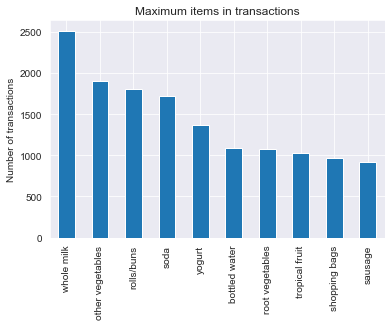

In [15]:
data_count_top['transactions'].plot(kind='bar')
plt.ylabel('Number of transactions')
plt.title('Maximum items in transactions')

Text(0.5, 1.0, 'Mimimum items in transactions')

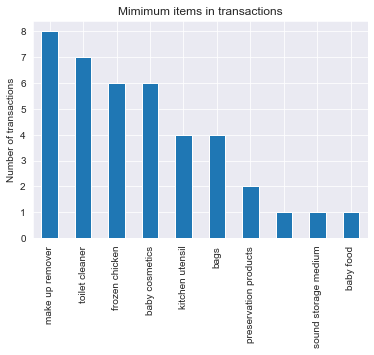

In [16]:
data_count_bottom['transactions'].plot(kind='bar')
plt.ylabel('Number of transactions')
plt.title('Mimimum items in transactions')

- Here, 3rd last item is dummy, we need to remove it before applying the agorithms

In [17]:
# zip the data
list_of_tuples = list(zip(items, frequencies))

In [18]:
list_of_tuples

[('whole milk', 2513),
 ('other vegetables', 1903),
 ('rolls/buns', 1809),
 ('soda', 1715),
 ('yogurt', 1372),
 ('bottled water', 1087),
 ('root vegetables', 1072),
 ('tropical fruit', 1032),
 ('shopping bags', 969),
 ('sausage', 924),
 ('pastry', 875),
 ('citrus fruit', 814),
 ('bottled beer', 792),
 ('newspapers', 785),
 ('canned beer', 764),
 ('pip fruit', 744),
 ('fruit/vegetable juice', 711),
 ('whipped/sour cream', 705),
 ('brown bread', 638),
 ('domestic eggs', 624),
 ('frankfurter', 580),
 ('margarine', 576),
 ('coffee', 571),
 ('pork', 567),
 ('butter', 545),
 ('curd', 524),
 ('beef', 516),
 ('napkins', 515),
 ('chocolate', 488),
 ('frozen vegetables', 473),
 ('chicken', 422),
 ('white bread', 414),
 ('cream cheese ', 390),
 ('waffles', 378),
 ('salty snack', 372),
 ('long life bakery product', 368),
 ('dessert', 365),
 ('sugar', 333),
 ('UHT-milk', 329),
 ('berries', 327),
 ('hamburger meat', 327),
 ('hygiene articles', 324),
 ('onions', 305),
 ('specialty chocolate', 299),
 

In [19]:
type(list_of_tuples)

list

#### Creating Data Frame for the transactions data

In [20]:
groceries_df  = pd.DataFrame(pd.Series(groceries_list))

In [21]:
groceries_df

,0
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."
9834,"[chicken, tropical fruit, other vegetables, vi..."


In [22]:
groceries_df = groceries_df.iloc[:9835,:] # removing the last empty transaction

In [23]:
groceries_df

,0
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [24]:
groceries_df.columns = ["transactions"]
groceries_df

,transactions
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [25]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
groceries_final_data = groceries_df['transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [26]:
groceries_final_data.T

,0,1,2,3,4,5,6,7,8,9,...,9825,9826,9827,9828,9829,9830,9831,9832,9833,9834
Instant food products,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UHT-milk,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
abrasive cleaner,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
artif. sweetener,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
baby cosmetics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
white wine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
whole milk,0,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
yogurt,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Analysis Part (Association)

##### A) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
##### B) Change the minimum length in apriori algorithm
##### C) Visulize the obtained rules using different plots

1) Combination 1:

    min support = 0.05
    max_len = 1
    
2) Combination 2:

    min support = 0.05
    max_len = 2
    
3) Combination 3:

    min support = 0.05
    max_len = 3
    
4) Combination 4:

    min support = 0.01
    max_len = 1
    
5) Combination 5:

    min support = 0.01
    max_len = 2
    
6) Combination 6:

    min support = 0.01
    max_len = 3

##### Combination 1

In [27]:
# apriori algorithm
frequent_glocerySets_1 = apriori(groceries_final_data, min_support = 0.05, use_colnames=True, max_len = 1)
frequent_glocerySets_1

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [28]:
# association rule criteria
rule_1 = association_rules(frequent_glocerySets_1, metric='lift', min_threshold = 1)
rule_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


- With this criteria, no association rule is work

##### Combination 2

In [29]:
# apriori algorithm
frequent_glocerySets_2 = apriori(groceries_final_data, min_support = 0.05, use_colnames=True, max_len = 2)
frequent_glocerySets_2

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [30]:
# association rule criteria
rule_2 = association_rules(frequent_glocerySets_2, metric='lift', min_threshold = 1)
rule_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


- With this combination, (whole milk) and (other vegetables) have max support of 0.0748
- Pair of (whole milk)-(yogurt) and (yogurt)-(whole milk) have max lift of 1.5718 

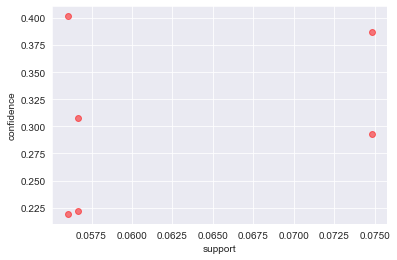

In [31]:
# support v/s confidence
support = rule_2['support']
confidence = rule_2['confidence']

plt.scatter(support, confidence, c = 'r', alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence') 

plt.show()

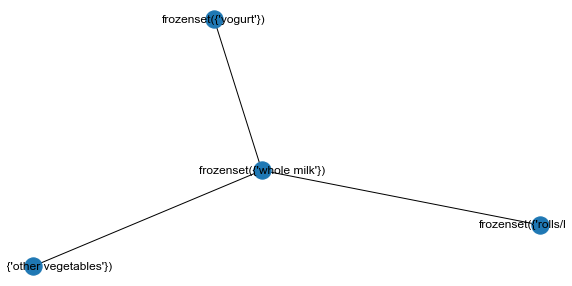

In [32]:
# graph visualization with node form
fig, ax = plt.subplots(figsize=(10,5))
GA = nx.from_pandas_edgelist(rule_2 , source = 'antecedents', target = 'consequents')
nx.draw(GA, with_labels = True)
plt.show()

- From above node visualzation, if person buy (whole milk) then they are also looking for (rolls/buns), (yogurt), (other vegetables)

##### Combination 3

In [33]:
# apriori algorithm
frequent_glocerySets_3 = apriori(groceries_final_data, min_support = 0.05, use_colnames=True, max_len = 3)
frequent_glocerySets_3

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [34]:
# association rule criteria
rule_3 = association_rules(frequent_glocerySets_3, metric='lift', min_threshold = 1)
rule_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


- We have same output as previous combination

##### Combination 4

In [35]:
# apriori algorithm
frequent_glocerySets_4 = apriori(groceries_final_data, min_support = 0.01, use_colnames=True, max_len = 1)
frequent_glocerySets_4

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
83,0.071683,(whipped/sour cream)
84,0.042095,(white bread)
85,0.019014,(white wine)
86,0.255516,(whole milk)


In [36]:
# association rule criteria
rule_4 = association_rules(frequent_glocerySets_4, metric='lift', min_threshold = 1)
rule_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


- With this criteria, no association rule is work

##### Combination 5

In [37]:
# apriori algorithm
frequent_glocerySets_5 = apriori(groceries_final_data, min_support = 0.01, use_colnames=True, max_len = 2)
frequent_glocerySets_5

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
296,0.012710,"(waffles, whole milk)"
297,0.032232,"(whipped/sour cream, whole milk)"
298,0.020742,"(whipped/sour cream, yogurt)"
299,0.017082,"(white bread, whole milk)"


In [38]:
# association rule criteria
rule_5 = association_rules(frequent_glocerySets_5, metric='lift', min_threshold = 1)
rule_5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
3,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
...,...,...,...,...,...,...,...,...,...
401,(yogurt),(whipped/sour cream),0.139502,0.071683,0.020742,0.148688,2.074251,0.010742,1.090455
402,(white bread),(whole milk),0.042095,0.255516,0.017082,0.405797,1.588147,0.006326,1.252912
403,(whole milk),(white bread),0.255516,0.042095,0.017082,0.066852,1.588147,0.006326,1.026532
404,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


- With this combination, (whole milk) and (other vegetables) have max support of 0.0748
- Pair of (whole milk)-(yogurt) and (yogurt)-(whole milk) have max lift of 1.5718 

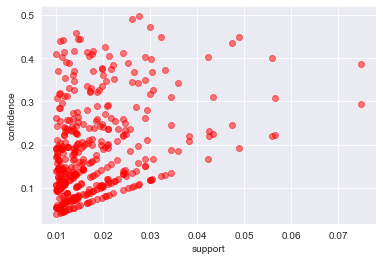

In [39]:
# support v/s confidence
support = rule_5['support']
confidence = rule_5['confidence']

plt.scatter(support, confidence, c = 'r', alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence')

plt.show()

In [40]:
# add condition: lift should be greater than 1 and confidence should be greater than 0.4
rule5 = rule_5[(rule_5['lift'] >= 1) & (rule_5['confidence'] >= 0.4)].sort_values('lift', ascending=False)
rule_top7 = rule5.head(7) # consider top 7 lift values 
rule5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
260,(onions),(other vegetables),0.031012,0.193493,0.014235,0.459016,2.372268,0.008234,1.490817
272,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
87,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,0.009593,1.383521
210,(hamburger meat),(other vegetables),0.033249,0.193493,0.013828,0.415902,2.149447,0.007395,1.380774
286,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565
75,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817
144,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,0.012517,1.461085
162,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030
398,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
358,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401


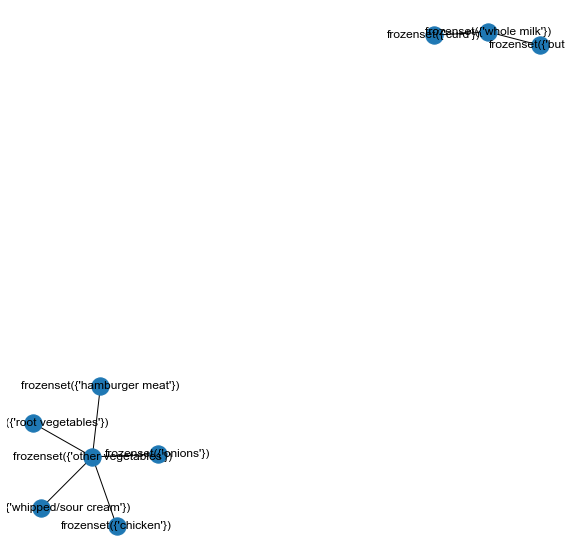

In [41]:
# graph visualization with node form
fig, ax = plt.subplots(figsize=(10,10))
GA = nx.from_pandas_edgelist(rule_top7 , source = 'antecedents', target = 'consequents')
nx.draw(GA, with_labels = True)
plt.show()

- From above node visualzation, there are two possible use cases
- if person buy (whole milk) then they are also looking for (butter) and (curd)
- if person buy (other vegetables) then they are also looking for (onions), (chicken), (root vegetables), (whipped/sour cream)

##### Combination 6

In [42]:
# apriori algorithm
frequent_glocerySets_6 = apriori(groceries_final_data, min_support = 0.01, use_colnames=True, max_len = 3)
frequent_glocerySets_6

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(root vegetables, tropical fruit, whole milk)"
329,0.014540,"(root vegetables, yogurt, whole milk)"
330,0.010473,"(soda, yogurt, whole milk)"
331,0.015150,"(tropical fruit, yogurt, whole milk)"


In [43]:
# association rule criteria
rule_6 = association_rules(frequent_glocerySets_6, metric='lift', min_threshold = 1)
rule_6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
3,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
...,...,...,...,...,...,...,...,...,...
593,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
594,"(yogurt, whole milk)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033
595,(whipped/sour cream),"(yogurt, whole milk)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881
596,(whole milk),"(whipped/sour cream, yogurt)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807


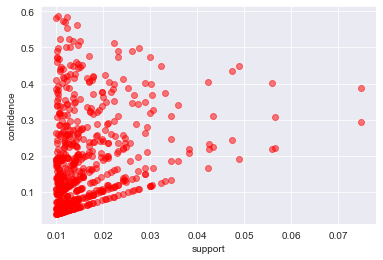

In [44]:
# support v/s confidence
support = rule_6['support']
confidence = rule_6['confidence']

plt.scatter(support, confidence, c = 'r', alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence')

plt.show()

In [45]:
# add condition: lift should be greater than 1 and confidence should be greater than 0.5
rule6 = rule_6[(rule_6['lift'] >= 1) & (rule_6['confidence'] >= 0.5)].sort_values('lift', ascending=False)
rule_top5 = rule6.head(5) # consider top 5 lift values 
rule6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
418,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
490,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
473,"(root vegetables, rolls/buns)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792
502,"(root vegetables, yogurt)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015
436,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
414,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
568,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
574,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
442,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
593,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719


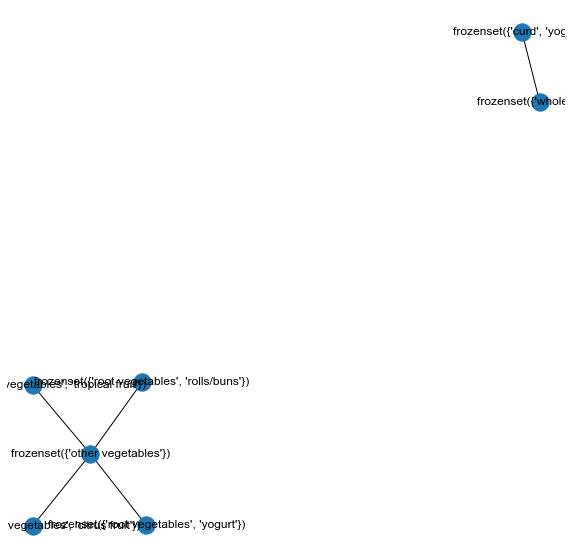

In [46]:
# graph visualization with node form
fig, ax = plt.subplots(figsize=(10,10))
GA = nx.from_pandas_edgelist(rule_top5 , source = 'antecedents', target = 'consequents')
nx.draw(GA, with_labels = True)
plt.show()

- From above node visualzation, there are two possible use cases
- if person buy (curd, yogurt) then they are also looking for (whole milk)
- if person buy (other vegetables) then they are also looking for (tropical fruit), (root vegetables), (citrus fruit), (olls/buns)